<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8523 - loss: 0.5024 - val_accuracy: 0.9581 - val_loss: 0.1384
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9655 - loss: 0.1136 - val_accuracy: 0.9688 - val_loss: 0.0990
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9740 - loss: 0.0802 - val_accuracy: 0.9748 - val_loss: 0.0875
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9824 - loss: 0.0566 - val_accuracy: 0.9752 - val_loss: 0.0807
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9846 - loss: 0.0484 - val_accuracy: 0.9775 - val_loss: 0.0810
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9871 - loss: 0.0392 - val_accuracy: 0.9769 - val_loss: 0.0869
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9773 - val_loss: 0.0840
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accur

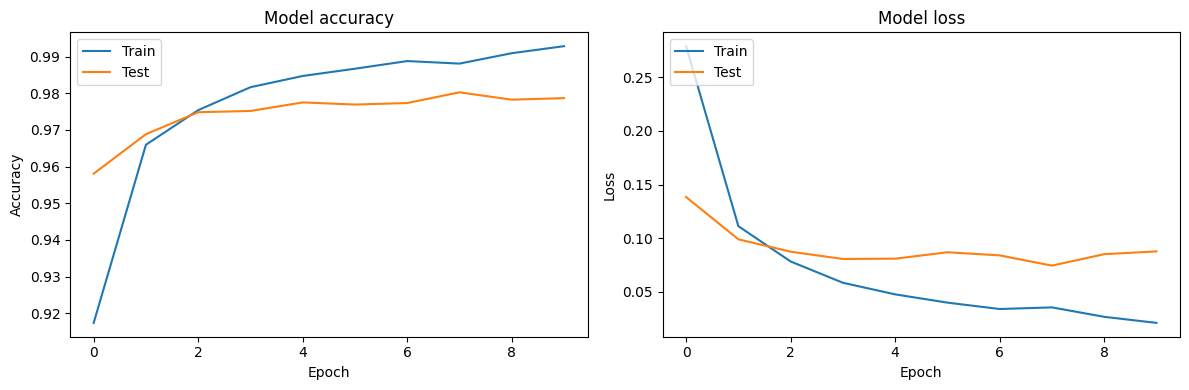

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


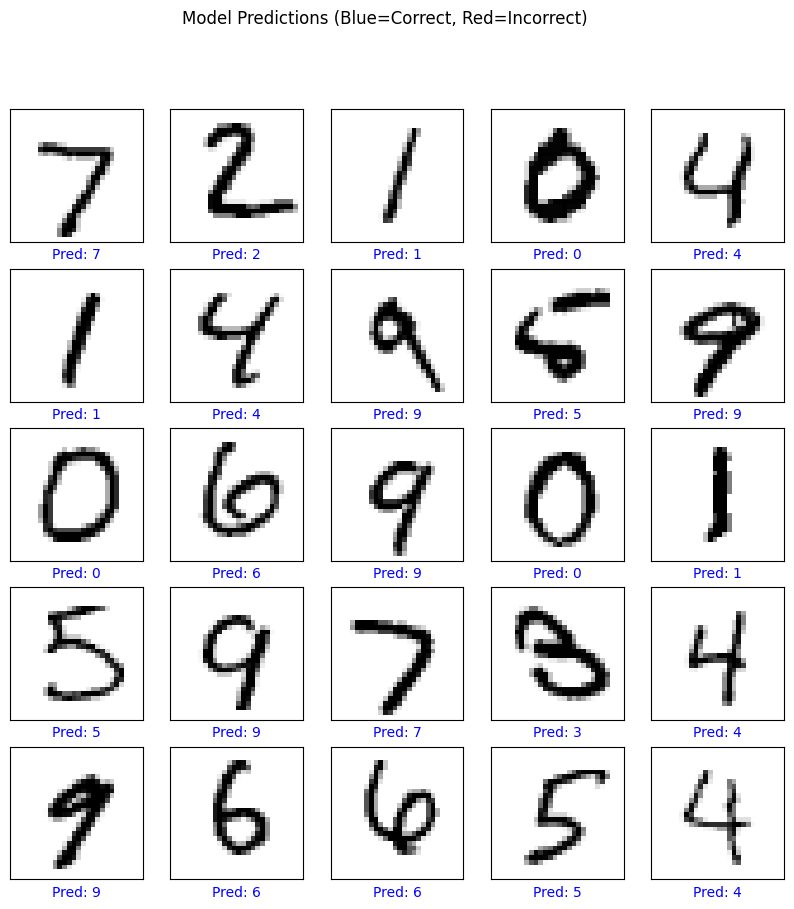


Do you want to predict your own handwritten digit image? (y/n): n
Exiting.


In [5]:
# -*- coding: utf-8 -*-
"""
This script trains a simple neural network to predict handwritten digits (0-9)
using the popular MNIST dataset. It also allows users to input their own
handwritten digit image for prediction.
"""
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import tkinter as tk
from tkinter import filedialog

def load_and_preprocess_data():
    """
    Loads the MNIST dataset and preprocesses it for training.

    Returns:
        A tuple containing (x_train, y_train), (x_test, y_test).
    """
    # Load the dataset from Keras
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize the images. Pixel values range from 0 to 255, so we scale
    # them to be between 0 and 1. This helps the training process.
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # One-hot encode the labels. For example, the number 5 becomes a vector
    # [0, 0, 0, 0, 0, 1, 0, 0, 0, 0].
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

def create_model():
    """
    Creates and compiles the neural network model.

    Returns:
        A compiled Keras model.
    """
    model = Sequential([
        # Flattens the 28x28 image into a 1D vector of 784 pixels.
        Flatten(input_shape=(28, 28)),

        # First dense layer with 512 neurons and ReLU activation.
        Dense(512, activation='relu'),

        # Dropout layer to prevent overfitting. It randomly sets 20% of
        # the input units to 0 at each update during training time.
        Dropout(0.2),

        # Second dense layer with 512 neurons and ReLU activation.
        Dense(512, activation='relu'),
        Dropout(0.2),

        # The output layer with 10 neurons (one for each digit 0-9).
        # Softmax activation is used to get a probability distribution over the classes.
        Dense(10, activation='softmax')
    ])

    # Compile the model with the Adam optimizer, categorical cross-entropy loss function,
    # and accuracy as the evaluation metric.
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def plot_history(history):
    """
    Plots the training and validation accuracy and loss.

    Args:
        history: A Keras History object containing training history.
    """
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

def visualize_predictions(model, x_test, y_test_labels):
    """
    Visualizes some predictions made by the model.

    Args:
        model: The trained Keras model.
        x_test: Test images.
        y_test_labels: Original non-one-hot-encoded test labels.
    """
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i], cmap=plt.cm.binary)
        if predicted_labels[i] == y_test_labels[i]:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"Pred: {predicted_labels[i]}", color=color)
    plt.suptitle("Model Predictions (Blue=Correct, Red=Incorrect)")
    plt.show()

def predict_custom_image(model):
    """
    Lets the user select a PNG image, preprocesses it, and predicts the digit.

    Args:
        model: The trained Keras model.
    """
    # Set up tkinter to create a file dialog
    root = tk.Tk()
    root.withdraw()  # Hide the main tkinter window

    # Open file dialog to select an image
    file_path = filedialog.askopenfilename(
        title="Select a handwritten digit PNG image",
        filetypes=[("PNG files", "*.png")]
    )

    if not file_path:
        print("No file selected.")
        return

    try:
        # --- Image Preprocessing ---
        # Open the image and convert it to grayscale ('L' mode)
        img = Image.open(file_path).convert('L')

        # The model was trained on white digits on a black background.
        # If your image is black on white, we need to invert it.
        img = ImageOps.invert(img)

        # Resize the image to 28x28 pixels, which is the input size for the model
        img = img.resize((28, 28))

        # Convert the PIL image to a numpy array
        img_array = np.array(img)

        # Normalize the pixel values from [0, 255] to [0.0, 1.0]
        img_array = img_array.astype('float32') / 255.0

        # Reshape the array to match the model's expected input shape: (1, 28, 28)
        processed_img = np.reshape(img_array, (1, 28, 28))

        # --- Prediction ---
        prediction = model.predict(processed_img)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        print(f"\nPredicted Digit: {predicted_digit}")
        print(f"Confidence: {confidence:.2f}%")

        # --- Visualization ---
        # Display the preprocessed image that was fed to the model
        plt.figure(figsize=(4, 4))
        plt.imshow(img_array, cmap=plt.cm.binary)
        plt.title(f"Your Image (Predicted: {predicted_digit})")
        plt.xticks([])
        plt.yticks([])
        plt.show()

    except Exception as e:
        print(f"An error occurred while processing the image: {e}")


if __name__ == '__main__':
    # 1. Load and preprocess the data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    # Keep a copy of original test labels for visualization
    (_, y_test_labels_orig) = mnist.load_data()[1]

    # 2. Create the neural network model
    model = create_model()
    model.summary()

    # 3. Train the model
    print("\n--- Starting Model Training ---")
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2) # Use 20% of training data for validation
    print("--- Model Training Complete ---\n")

    # 4. Evaluate the model on the test set
    loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test accuracy: {accuracy*100:.2f}%")
    print(f"Test loss: {loss:.4f}")

    # 5. Plot training history
    plot_history(history)

    # 6. Visualize some predictions on the test set
    visualize_predictions(model, x_test, y_test_labels_orig)

    # 7. Allow user to predict their own image in a loop
    while True:
        choice = input("\nDo you want to predict your own handwritten digit image? (y/n): ").lower()
        if choice == 'y':
            predict_custom_image(model)
        elif choice == 'n':
            print("Exiting.")
            break
        else:
            print("Invalid input. Please enter 'y' or 'n'.")

